# Sampled data

**ENGSCI233: Computational Techniques and Computer Systems** 

*Department of Engineering Science, University of Auckland*

Sampled data is defined as ***a set of measurements of a continuous process at discrete points (locations or times)***. 

We shall use the following terminology. 
 - The **continuous process** is $y(x)$, with $x$ the **independent variable** (e.g., position, time) and $y$ the **dependent variable** (e.g., velocity, temperature, force).
 - The set of $N$ **measurement points** are $[x_0,x_1,\cdots x_{n-1}]$ or, more compactly, $x_i$, where the index, $i$, indicates "*could be any of the values 0 through to $n-1$*".
 - The corresponding set of $N$ **measurements values** are $[y(x_0), y(x_1),\cdots y(x_{n-1})]$, or $[y_0, y_1,\cdots y_{n-1}]$, or $y_i$.

As an example, consider the set of eight temperature measurements (points and values) in the table below:

![alt text](rendered_table.png "Table")

In this case: $N=8$; the dependent variable is temperature, $T$; and the independent variable is time, $t$, i.e., $y(x)\equiv T(t)$. Note, there is no requirement that the measurement points are evenly spaced.

***Run the code in the cell below to view the data.***

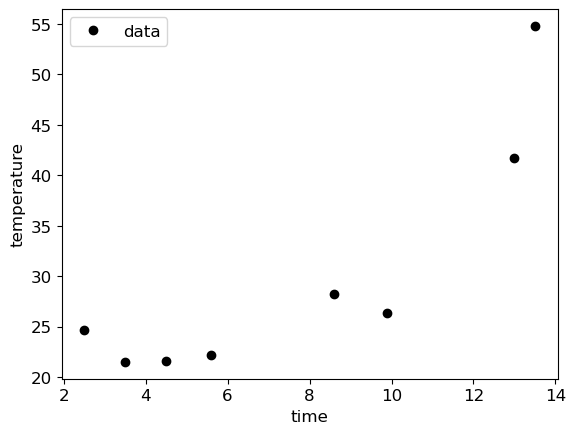

In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sampled_data233 import plot_data

# specify the data as numpy arrays
xi = np.array([2.5, 3.5, 4.5, 5.6, 8.6, 9.9, 13.0, 13.5])
yi = np.array([24.7, 21.5, 21.6, 22.2, 28.2, 26.3, 41.7, 54.8])

# plot the data
f,ax = plt.subplots(1,1)
plot_data(xi,yi,ax,label='data');

The sampled data $(x_i,y_i)$ provide an **incomplete picture** of the continuous process $y(x)$. We shall consider two uses of such data: **interpolation** and **integration**.

## [1 Interpolation](https://en.wikipedia.org/wiki/Interpolation)

<mark>***Filling in the gaps between data.***</mark>

Often we may need a measurement at a particular point or points, $x_j$, for which there are no data (note, I am using the index $i$ for data we **do have**, and $j$ for data we **don't**). However, if there is data **either side** of the unknown point, then we can use this information to approximate $y_j=y(x_j)$: this is known as **interpolation**. 

***Run the code in the cell below to see proposed interpolation points, $x_j$.***

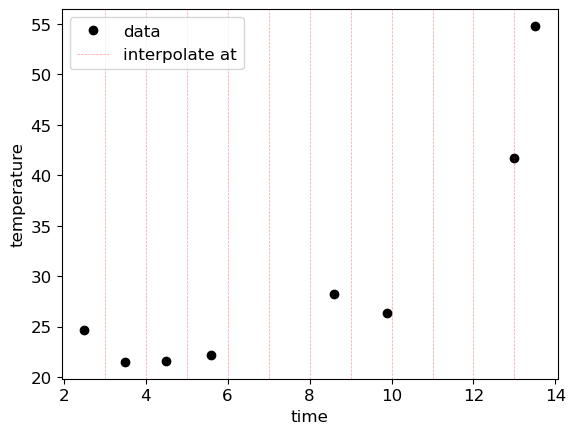

In [3]:
# import functions
from sampled_data233 import plot_interpolation_lines

# specify the interpolation locations
xj = np.linspace(3., 13., 11)

# plot the data
f,ax = plt.subplots(1,1)
plot_data(xi,yi,ax,label='data')

# plot interpolation locations as vertical lines
plot_interpolation_lines(xj, ax);

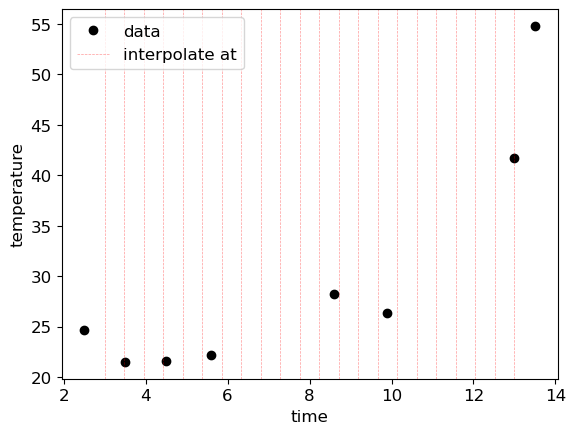

In [4]:
# import functions
from sampled_data233 import plot_interpolation_lines

# specify the interpolation locations
xj = np.linspace(3., 13., 22)

# plot the data
f,ax = plt.subplots(1,1)
plot_data(xi,yi,ax,label='data')

# plot interpolation locations as vertical lines
plot_interpolation_lines(xj, ax);

***Modify the code above so that interpolation is twice as frequent.***

We shall consider three methods of interpolation. They are all variations on the same strategy:
1. Find an **interpolating function**, $f(x)$, that exactly or approximately matches the data, i.e., $y_i= \text{or}\approx f(x_i)$.
2. Find $y_j$ by **evaluating** $f(x)$ at the points of interest, i.e., $y_j=f(x_j)$.

The three methods - (i) polynomial fitting, (ii) piecewise linear interpolation, and (iii) cubic splines - differ only in how they **determine** $f(x)$.

Note, we are assuming the $x_j$ lies within the range of our data, i.e., $x_0\leq x_j\leq x_{n-1}$. If $x_j$ lies outside this range, the process is called **extrapolation**. 

### [1.1 Polynomial fitting](https://en.wikipedia.org/wiki/Polynomial_regression)

You have probably already encountered this type of interpolation. For example, finding the **line of best fit** is an example of fitting a polynomial of order 1 to a set of points. 

Suppose the interpolating function is a polynomial, e.g., $f(x)=3x^4-2x^2+2$ or $T=f(t)=-8.35t +1.06\times 10^4$. We need to determine:
- What **order** should the polynomial be? (What is the highest power of the independent variable?)
- How should I find its **coefficients**?

The first point is a judgment call on your part. As we shall see, you are trading off polynomial complexity against the ability to fit the data. As a general rule, you should ***seek the simplest polynomial that does a "good job fitting the data"***.

#### 1.1.1 Theory

A polynomial of order $m$ has the form

$$ f(x) = \sum\limits_{k=0}^{m} a_k x^k $$

where we use index $k$ to distinguish coefficients $a_k$, which refer to a specific exponent $k$, from the data index, $i$, and the interpolation index, $j$. The coefficients are denoted by $a_k$, e.g., for the polynomial $y=1-3x+2x^2$, $a_k=[1,-3,2]$. 

**Attention:** Always check the notation for index $k$, when using numerical libraries like numpy. Its polyfit function uses the convention $ f(x) = \sum\limits_{k=0}^{m} b_k x^{m-k}$.

We need to find the values of $a_k$ that provide the "**best fit to the data**" - let's define that phrase.

We **know** that the data has values $y_i$ (we measured those). The interpolating function **"predicts"** that the data should have values $f(x_i)$. Generally, these will **not** be equal, i.e., $y_i \neq f(x_i)$.

***"Doesn't that make it a terrible interpolating function?"***

Not necessarily, providing that the $f(x_i)$ is **reasonably close** to $y_i$. Formally, we define how close they are by (i) taking the difference between $f(x_i)$ and $y_i$, (ii) squaring it (so there is no difference between under and overpredicting), and (iii) adding the squared differences for all data points (to obtain a single number). Thus, the **residual sum of squares** $RSS$ is given

$$ \text{RSS} = (y_0-f(x_0))^2+(y_1-f(x_1))^2+\cdots (y_{n-1}-f(x_{n-1}))^2 = \sum\limits_{i=0}^{n-1}\left(y_i-(a_0+a_1x_i+a_2x_i^2+\cdots a_mx_i^m)\right)^2 $$

This single number is a quantitative measure of "*how good does the interpolating function match the data*". However, the reported value is typically the *mean squared error* $\text{MSE}=\frac{1}{n} \text{RSS}$.

The next goal is to find values of the coefficients, $a_k$, that minimize $R^2$. Generally speaking, how do we find $x$ that minimises $y(x)$? Why, by finding the value $x$ where $dy/dx=0$ of course! (And maybe checking the second derivative is >0 to prove this is a minimum.)

Given there are $m$ coefficients for us to find, this means we can form equations for $m$ derivatives (one each with respect to the $m$ coefficients $a_k$) and solve these simultaneously. For example, for the case $m=2$, we have $f(x)=a_0+a_1x+a_2x^2$, and we can formulate three equations:

$$ \frac{\partial\text{RSS}}{\partial a_0}=-2 \sum\limits_{i=0}^{n-1}\left(y_i - (a_0+a_1x_i+a_2x_i^2)\right)=0,$$

$$ \frac{\partial\text{RSS}}{\partial a_1}=-2 \sum\limits_{i=0}^{n-1} x_i \left(y_i - (a_0+a_1x_i+a_2x_i^2)\right)=0,$$

$$ \frac{\partial\text{RSS}}{\partial a_2}=-2 \sum\limits_{i=0}^{n-1} x_i^2\left(y_i - (a_0+a_1x_i+a_2x_i^2)\right)=0.$$

***Confirm that you can obtain these equations: differentiate the expression for $\text{RSS}$ with respect to the coefficients, $a_k$, and set equal to zero (you will need to use the chain rule and hold the $x_i$ constant).***

Each of these equations can be rearranged in terms of (1) a LHS that depends on the unknown coefficients, $a_k$, and (2) a RHS that depends only on the known data, $x_i$ and $y_i$. For example, the first equation can be rewritten as:

$$ (n)a_0 + \left(\sum x_i\right) a_1 + \left(\sum x_i^2\right)a_2 = \sum y_i  $$

We can write the three equations using the **Vandermonde matrix** for the LHS:

$$ \begin{bmatrix} n \quad \sum x_i \quad \sum x_i^2 \\ \sum x_i \quad \sum x_i^2 \quad \sum x_i^3 \\ \sum x_i^2 \quad \sum x_i^3 \quad \sum x_i^4\end{bmatrix} \begin{bmatrix} a_0 \\ a_1 \\ a_2 \end{bmatrix} = \begin{bmatrix} \sum y_i \\ \sum x_iy_i \\ \sum x_i^2y_i \end{bmatrix}.  $$

This system of equations is now in the form $A\mathbf{x}=\mathbf{b}$ and can be solved (numerically) using the LU factorization algorithm developed last week.

For an $m$ order polynomial, the expression above generalizes:

$$ \begin{bmatrix} 
&n& \quad &\sum x_i& \quad &\sum x_i^2& \quad &\cdots& \quad &\sum x_i^m& \\ 
&\sum x_i& \quad &\sum x_i^2& \quad &\sum x_i^3&  \quad &\cdots& \quad &\sum x_i^{m+1}& \\
&\sum x_i^2& \quad &\sum x_i^3& \quad &\sum x_i^4& \quad &\cdots& \quad &\sum x_i^{m+2}& \\
&\vdots& \quad &\vdots& \quad &\vdots& \quad &\ddots& \quad &\vdots& \\
&\sum x_i^m& \quad &\sum x_i^{m+1}& \quad &\sum x_i^{m+2}& \quad &\cdots& \quad &\sum x_i^{2m}& \end{bmatrix} 
\begin{bmatrix} a_0 \\ a_1 \\ a_2 \\ \vdots \\ a_m\end{bmatrix} = \begin{bmatrix} \sum y_i \\ \sum x_iy_i \\ \sum x_i^2y_i \\ \vdots \\ \sum x_i^m y_i \end{bmatrix}.  $$


#### 1.1.2 Algorithm

The key algorithm steps for polynomial fitting are:
```
1. Initialise: polynomial order M, data XI, YI.
2. Construct size M+1 square Vandermonde matrix using data XI.
3. Construct length M+1 RHS vector using data XI, YI.
4. Solve Ax=b for coefficients of f(x).
 - compute LU decomposition of A using LU_factor
 - find x using LU_solve
```
Once the coefficients of $f(x)$ are determined, interpolation proceeds straightforwardly:
```
5. Initialise: interpolation locations, XJ.
6. Evaluate f(x) at XJ.
```
A completed Python implementation of polynomial fitting is given in `sampling233.py` and demonstrated in the next section.

#### 1.1.3 Demonstration

In [ ]:
# import functions
from ipywidgets import interact, fixed
from sampled_data233 import plot_polynomial_elements

def polynomial_fitting_figure(order=1, interpolate = False, extrapolate = False, xi = None, yi = None, xj = None):
    # create figure
    f,ax = plt.subplots(1,1)
    f.set_size_inches(5,5)
    
    # see sampling233.py for details on the Python implementation of polynomial fitting
    plot_polynomial_elements(ax, xi, yi, xj, order, interpolate, extrapolate)

# run the interactive figure environment
interact(polynomial_fitting_figure, order = (1,7,1), interpolate = False, extrapolate = False, xi = fixed(xi), 
         yi = fixed(yi), xj = fixed(xj));

interactive(children=(IntSlider(value=1, description='order', max=7, min=1), Checkbox(value=False, description…

In [ ]:
# EXPERIMENT with the order of the fitted function above to obtain
# the BEST polynomial.

# To determine BEST, weigh the CRITERIA below:
# - MISFIT with the data
# - PLAUSIBILITY of the equation
# - ability to EXTRAPOLATE

# ENTER your answer in POLYNOMIAL FITTING ORDER poll on the MODULE PAGE

#### 1.1.4 Concept questions

**Compare the interpolating function for $m=2$ and $m=6$:**
- Which fits the data better?
- Which looks more like a physical process?
- Which is the better choice for $m$? If you chose $2$, how do you justify not matching the data?*

>data fits better at order 6, known data points are precise and close to the interpolated points

**What value of $m$ ensures that the $\text{RSS}$ is (almost) zero? How does this relate to the number of data points?**

>when m = 7 -> RSS value is closer to zero. For a polynomial with RSS of zero inidcates it fits better and provides more data interpolation data points.

**When $\text{RSS}=0$, $f(x)$ passes through all the data points exactly. Why might this be a bad thing?**

>This indicate that the data is overfitting - Difference between known and predicted being zero means when havent then interpolated or predicted a new point in the trend. Passing through all points means we havent predicted or found a new point.

**Why do we encounter problems when setting $m=8$.**

>overfits the data

**Can $f(x)$ be used for extrapolation? (i.e., is $f(x)$ defined for $x_j<x_0$ or $x_j>x_{n-1}$?)**

>Yes however RSS values are very high.


### [1.2 Piecewise linear interpolation](https://en.wikipedia.org/wiki/Linear_interpolation#Linear_interpolation_between_two_known_points)

This method **fits a straight line segment between neighbouring data points**. For $N$ data points, there are $N-1$ adjacent data pairs, and the set of $N-1$ straight line segments defines the interpolating function, $f(x)$, in a **piecewise** manner.

This interpolation method is commonly used and is easy to implement. It is one of a subset of methods called **Lagrange interpolation**.

Piecewise linear interpolation adopts the same perspective of sampled data as the **finite difference** formula and the **Euler method**, i.e., "*we don't know what happens between these two points, let's assume its a straight line.*"

#### 1.2.1 Theory

Define the $i^{\text{th}}$ **subinterval** between neighbouring data points, $I_i=[x_i, x_{i+1}]$. The straight line linking these points is given by:

$$y_i(x) = y_i + \frac{y_{i+1}-y_i}{x_{i+1}-x_i}(x-x_i) = m_ix+c_i$$

where $m_i=(y_{i+1}-y_i)/(x_{i+1}-x_i)$ and $c_i=y_i-m_ix_i$ i.e., the gradient and intercept of the straight line.

#### 1.2.2 Algorithm

The key algorithm steps for piecewise linear interpolation are:
```
1. Initialise data XI, YI.
2. For the ith subinterval, compute the straight line gradient, mi, and intercept, ci.
3. Find which interpolation points, xj, fall within the subinterval, i.e., xi<xj<xi+1.
4. Evaluate the piecewise interpolating function at xj.
```
A Python implementation of piecewise linear interpolation is given in `sampling233.py` and demonstrated in the next section.

#### 1.2.3 Demonstration

In [ ]:
# import functions
from sampled_data233 import plot_piecewise_elements

def piecewise_linear_figure(interpolate = False, xi = None, yi = None, xj = None):
    # create figure
    f,ax = plt.subplots(1,1)
    f.set_size_inches(5,5)
    
    # see sampling233.py for details on the Python implementation of piecewise linear interpolation
    plot_piecewise_elements(ax, interpolate, xi, yi, xj)

# run the interactive figure environment
interact(piecewise_linear_figure, interpolate = False, xi = fixed(xi), yi = fixed(yi), xj = fixed(xj));

#### 1.2.4 Concept questions

***The interpolating function passes through each point exactly. Explain when this could be a disadvantage.***

> <mark>*~ your answer here ~*</mark>

***$f(x)$ is continuous at the data points. Are its derivatives?***

> <mark>*~ your answer here ~*</mark>

***Can $f(x)$ be used for extrapolation?***

> <mark>*~ your answer here ~*</mark>


***- - - - CLASS CODING EXERCISE - - - -***

In [ ]:
# PART ONE
# --------
# SUPPOSE we have the interpolating function
def interp(x0,y0,x1,y1,x): 
    return y0 + (y1 - y0)/(x1 - x0)*(x - x0)
# and the data XI and YI
xi = np.array([2.5, 3.5, 4.5, 5.6, 8.6, 9.9, 13.0, 13.5])
yi = np.array([24.7, 21.5, 21.6, 22.2, 28.2, 26.3, 41.7, 54.8])

# for example
x = 3
y = interp(xi[0], yi[0], xi[1], yi[1], x)
print(x,y)

# For the interpolation value X below, loop over PAIRS of data points in XI
# to FIND the interval that X lies inside of, then perform the interpolation
x = 6.8
# **your code here**

In [ ]:
for i in range(xi.shape[0]-1):
    if x >= xi[i] and x < xi[i+1]:
        print(i, interp(xi[i], yi[i], xi[i+1], yi[i+1], x))

In [ ]:
i = np.argmax(np.logical_and(x >= xi[:-1], x < xi[1:]))
print(i, interp(xi[i], yi[i], xi[i+1], yi[i+1], x))

In [ ]:
# OPTIONAL CHALLENGE
# -----------------
# Do the same thing, but for 
xj = [3, 4, 5, 6, 7, 8, 9, 10]

### [1.3 Cubic splines](https://en.wikipedia.org/wiki/Spline_interpolation)

In order to overcome **derivative discontinuity** inherent in piecewise linear interpolation (and higher order Lagrange schemes), cubic splines are used. Like the previous method, for $N$ data points, spline based interpolation breaks the range of the interpolating function into $N-1$ subintervals of the form $I_i = [x_i , x_{i+1}]$. A **different** cubic polynomial, **passing through the data exactly**, is then used to interpolate within each subinterval. 

The polynomials are chosen so that $f(x)$, and its **first and second derivatives are continuous** at the subinterval boundaries, $x_i$. 

#### 1.3.1 Theory

For the $i^{\text{th}}$ subinterval, define the cubic polynomial, $p_i(x)$, with coefficients

$$p_i(x) = a_0^{(i)} + a_1^{(i)}(x − x_i) + a_2^{(i)}(x − x_i)^2 + a_3^{(i)}(x − x_i)^3.$$

Note, the superscript $(i)$ means "*this coefficient belongs to the $i^{\text{th}}$ subinterval*", not "*to the power $i$*".

Similarly for the neighbouring subintervals ($i-1$ and $i+1$), we can write

$$p_{i-1}(x) = a_0^{(i-1)} + a_1^{(i-1)}(x − x_{i-1}) + a_2^{(i-1)}(x − x_{i-1})^2 + a_3^{(i-1)}(x − x_{i-1})^3.$$

$$p_{i+1}(x) = a_0^{(i+1)} + a_1^{(i+1)}(x − x_{i+1}) + a_2^{(i+1)}(x − x_{i+1})^2 + a_3^{(i+1)}(x − x_{i+1})^3.$$

**How many unknowns?**

As with polynomial fitting, there are a certain number of unknown polynomial coefficients. We shall set up an equal number of equations and solve these simultaneously. **How many unknowns?** Well, there are $N-1$ subintervals (for $N$ data points there are $N-1$ neighbouring pairs), and *for each* subinterval, there are 4 unknowns. So we need $4(N-1)$ equations.

Recall when solving ODEs: first we obtain the general solution with **unknown constants**, then we find the particular solution (and the values of the constants) by applying **initial and boundary conditions**. We shall take the same approach here and use conditions for (i) the **value** and (ii) the **slope** of the interpolating function at the subinterval boundaries.

**Boundary conditions on function value**

We said that the cubic polynomials for each subinterval **must** pass through the bounding data points, $(x_i, y_i)$, exactly. Therefore, $p_i(x_i)=y_i$ and $p_i(x_{i+1})=y_{i+1}$, or

$$y_i = a_0^{(i)},\quad\quad y_{i+1}=a_0^{(i)} + a_1^{(i)}\Delta x_i + a_2^{(i)}\Delta x_i^2 + a_3^{(i)}\Delta x_i^3,\quad\quad \Delta x_i=x_{i+1}-x_i,\quad\quad i=[0,1,\cdots n-2].$$

This gives us $2$ equations for each of the $N-1$ subintervals ($2(N-1)$ equations down, $2(N-1)$ to go...) 

**Boundary conditions on function derivatives**

We also said that the cubic polynomials for each subinterval must have a first and second order derivative that is **continuous** with its neighbours. The first derivative of the polynomial for the $i^{\text{th}}$ subinterval is:

$$ \frac{dp_i}{dx}=a_1^{(i)}+2a_2^{(i)}(x-x_i)+3a_3^{(i)}(x-x_i)^2 $$

and for the $i+1$ subinterval:

$$ \frac{dp_{i+1}}{dx}=a_1^{(i+1)}+2a_2^{(i+1)}(x-x_{i+1})+3a_3^{(i+1)}(x-x_{i+1})^2.$$

These two subintervals share a boundary at $x=x_{i+1}$ and here the first derivatives **must** be equal, therefore

$$a_1^{(i)}+2a_2^{(i)}\Delta x_i+3a_3^{(i)}\Delta x_i^2-a_1^{(i+1)}=0,\quad\quad i=[0,1,\cdots n-2].$$

We have one equation of this type for each pair of neighbouring subintervals, i.e., another $N-2$ equations.

Applying similar reasoning, but now requiring the **second** derivative to be continuous, leads to another $N-2$ equations of the form

$$2a_2^{(i)}+6a_3^{(i)}\Delta x_i-2a_2^{(i+1)}=0,\quad\quad i=[0,1,\cdots n-2].$$

**Finding the last two equations**

So far we have used continuity of function value and slope to define $4(N-1)-2$ equations for $4(N-1)$ unknowns. The last two equations, which define a class of cubic splines called **natural** splines, are obtained by requiring the second derivative at the **data extremes** ($x_0$ and $x_{n-1}$) to be zero, i.e.,

$$ 2a_2^{(0)}=0, \quad\quad 2a_2^{(n-2)}+6a_3^{(n-2)}\Delta x_{n-2}=0.$$

Note, an alternative approach is the "not-a-knot" condition, which instead requires the **third** derivative at the first and last subinterval boundaries to be equal.

**Putting it all together**
The $4(N-1)$ equations in $4(N-1)$ unknowns are found by setting up a matrix equation of the form $A\mathbf{x}=\mathbf{b}$, where $\mathbf{x}$ is the vector of unknown polynomial coefficients, entries in the matrix, $A$, depend only on the terms $c_i$ (the spacing between data points), and the RHS vector, $\mathbf{b}$, contains only the measurements, $y_{i}$.

#### 1.3.2 Algorithm

The key algorithm steps for constructing cubic splines are:
```
1. Set up the matrix, A, populating with appropriate coefficients of the terms in aj^(i) in the equations above.
2. Set up the RHS vector, b, populating with the appropriate righthandsides of the equations above.
3. Use LU factorization to solve the matrix equation and obtain the spline coefficients.
4. Use the spline coefficients to interpolate at the desired points.
```
Python implementation of this algorithm is the subject of Lab 4. A demonstration is provided in the next section.

#### 1.3.3 Demonstration

Run the code in the cell below for a visual illustration of cubic spline interpolation (using Python's built in spline functions).

In [2]:
# import functions
from sampled_data233 import plot_spline_elements

def cubic_spline_figure(interpolate = False, SubIntEqn = 0, xi = None, yi = None, xj = None):
    # create figure
    f,ax = plt.subplots(1,1)
    f.set_size_inches(5,5)
    
    # see sampling233.py for use of Python built-in spline interpolation
    plot_spline_elements(ax, interpolate, SubIntEqn, xi, yi, xj)

# run the interactive figure environment
interact(cubic_spline_figure, interpolate = False, SubIntEqn = (0,7,1), xi = fixed(xi), yi = fixed(yi), xj = fixed(xj));

NameError: name 'xi' is not defined

#### 1.3.4 Concept questions

***What are the advantages and disadvantages of cubic spline interpolation compared to polynomial fitting and piecewise linear interpolation?***

> <mark>*~ your answer here ~*</mark>
